In [659]:
import seaborn as sns
import pandas as pd

#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np   

In [660]:
datas=pd.read_csv("~/Downloads/Dataset/diabetes.csv")
#datas ko copy banako
print(type(datas))
copy=datas.copy()
print(type(copy))
print(copy["Pregnancies"].max())


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
17


In [661]:
copy.info() 
#sabbai column numeric xa. BMI and DiabetesPedigreeFunction: Float other all int
#Total_column=9

'''
Columns
0: Number of times pregnant, 1: 2: Diastolic blood pressure
3: Skin fold thickness, 4: 5: BMI
6:a function which scores likelihood of diabetes based on family history
7: Age, 8: [0:Non-diabetic,1:Diabetic]
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


'\nColumns\n0: Number of times pregnant, 1: 2: Diastolic blood pressure\n3: Skin fold thickness, 4: 5: BMI\n6:a function which scores likelihood of diabetes based on family history\n7: Age, 8: [0:Non-diabetic,1:Diabetic]\n'

In [662]:
copy.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [663]:
copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [664]:
copy.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [665]:
print(copy["Glucose"].min())
print(copy["BloodPressure"].min())
print(copy["SkinThickness"].min())
print(copy["Insulin"].min())
print(copy["BMI"].min())
print(copy["Age"].min())
print(copy["DiabetesPedigreeFunction"].min())

0
0
0
0
0.0
21
0.078


In [744]:
#Keeping mode in null values
temp=copy["Glucose"].mode()[0]
#print(copy["Pregnancies"].max())
copy.loc[copy["Glucose"] <= 0,"Glucose"] = temp
print(copy["Glucose"].min())
#print(copy.head())


44.0


In [741]:
copy["BloodPressure"]=copy["BloodPressure"].replace(0,np.nan)
temp=int(copy["BloodPressure"].mean())
copy["BloodPressure"]=copy["BloodPressure"].fillna(temp)
print(copy["BloodPressure"].isnull().sum())
# print(copy.head())


0


In [729]:
copy["SkinThickness"]=copy["SkinThickness"].replace(0,np.nan)
temp=int(copy["SkinThickness"].median())
copy["SkinThickness"]=copy["SkinThickness"].fillna(temp)
copy["SkinThickness"].min()
#print(copy["SkinThickness"].unique())
#print(copy.head())


np.float64(7.0)

In [734]:
copy["Insulin"]=copy["Insulin"].replace(0,np.nan)
mean=int(copy["Insulin"].mean())
copy["Insulin"]=copy["Insulin"].fillna(mean)
print(copy["Insulin"].min())

14.0


In [732]:
copy["BMI"]=copy["BMI"].replace(0,np.nan)
median=int(copy["BMI"].median())
copy["BMI"]=copy["BMI"].fillna(median)
print(copy["BMI"].min())

18.2


In [733]:
copy["DiabetesPedigreeFunction"].min()


np.float64(0.078)

In [736]:
for columns in copy:
    print(f"{columns}: {copy[columns].min()}")

Pregnancies: 0.0
Glucose: 44.0
BloodPressure: 24.0
SkinThickness: 7.0
Insulin: 14.0
BMI: 18.2
DiabetesPedigreeFunction: 0.078
Age: 21.0
Outcome: 0.0
Insulin/Glucose: 0.07777777777777778
Age_category: Adult
Glucose_comment: Above_Average(bad)
Diabetic: Diabetic


In [747]:
print(copy.isnull().sum())
copy=copy.dropna()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Insulin/Glucose             0
Age_category                0
Glucose_comment             0
Diabetic                    0
dtype: int64


In [624]:
#Datas haru pailai category like 0,1 ma xa. So hamile category ma change garnu parena

17.0


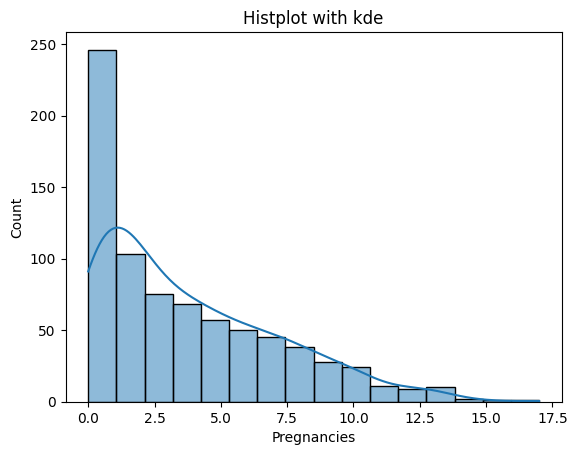

In [625]:
sns.histplot(copy["Pregnancies"],kde=True)
plt.title("Histplot with kde")
print(copy["Pregnancies"].max())
#Kata skewness badi xa thaha pauxa

Text(0.5, 0, 'No of pregnancies')

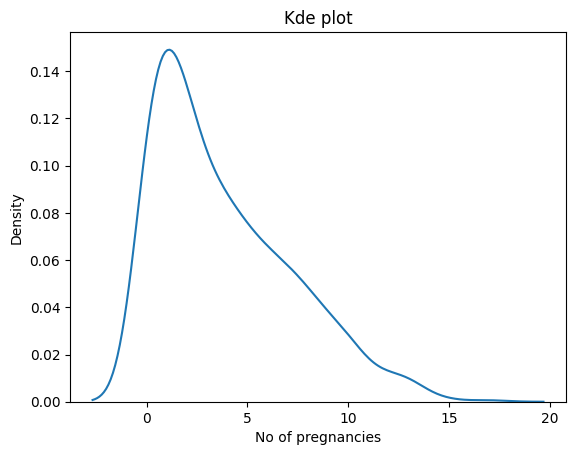

In [626]:
plt.title("Kde plot")
sns.kdeplot(copy["Pregnancies"])
plt.xlabel("No of pregnancies")

<Axes: xlabel='BMI', ylabel='Count'>

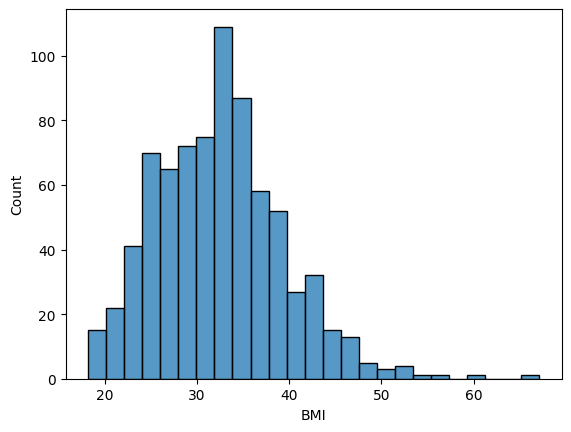

In [627]:
sns.histplot(copy["BMI"])

<Axes: xlabel='Age', ylabel='Count'>

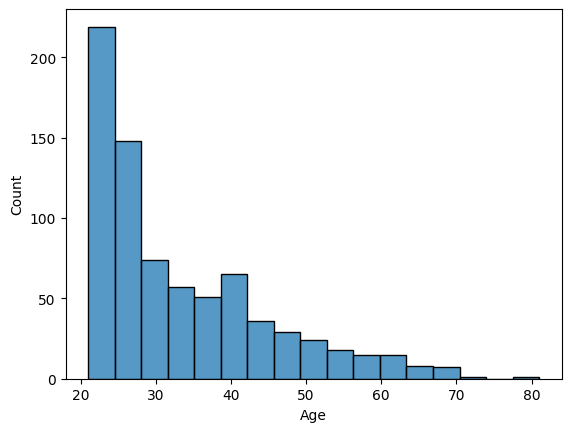

In [628]:
sns.histplot(copy["Age"])

<Axes: xlabel='Outcome', ylabel='Density'>

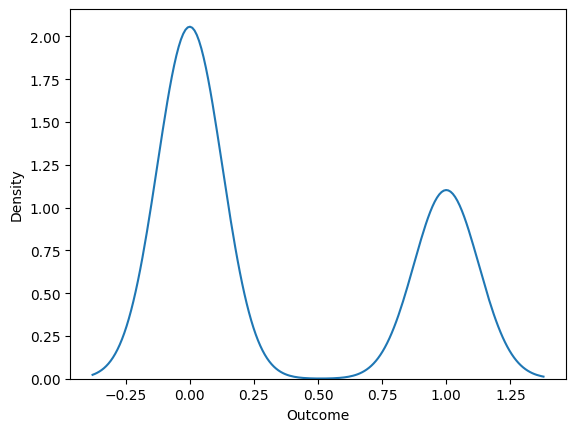

In [629]:
sns.kdeplot(copy['Outcome'])

In [630]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 0 to BloodPressure
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             769 non-null    float64
 4   Insulin                   769 non-null    float64
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 76.2+ KB


<Axes: >

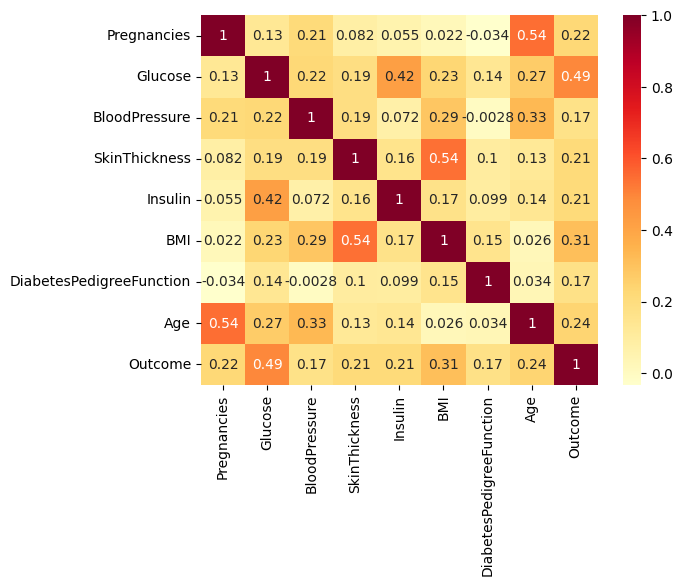

In [631]:
sns.heatmap(copy.corr(), annot=True, cmap="YlOrRd")

In [632]:
"""Detection of outlier"""

'Detection of outlier'

<Axes: ylabel='Pregnancies'>

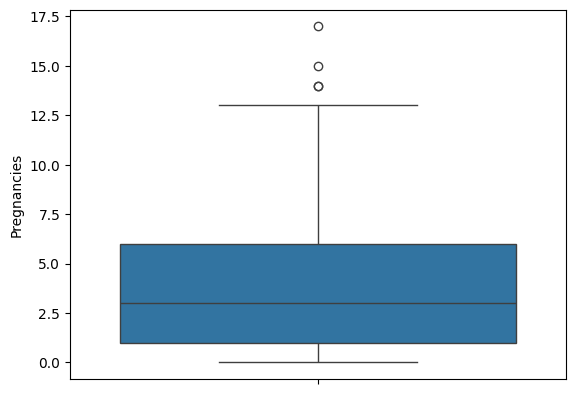

In [633]:
sns.boxplot(copy["Pregnancies"])

Text(0.5, 1.0, 'No outlier')

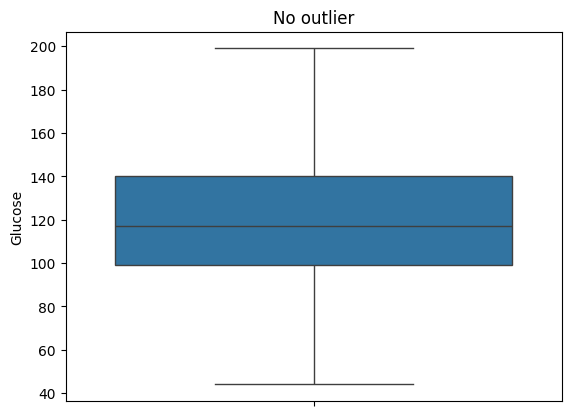

In [634]:
sns.boxplot(copy["Glucose"])#No outlier
plt.title("No outlier")

<Axes: ylabel='BloodPressure'>

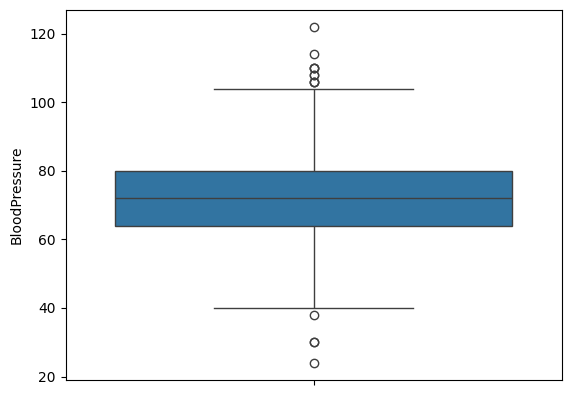

In [635]:
sns.boxplot(copy["BloodPressure"])


<Axes: ylabel='SkinThickness'>

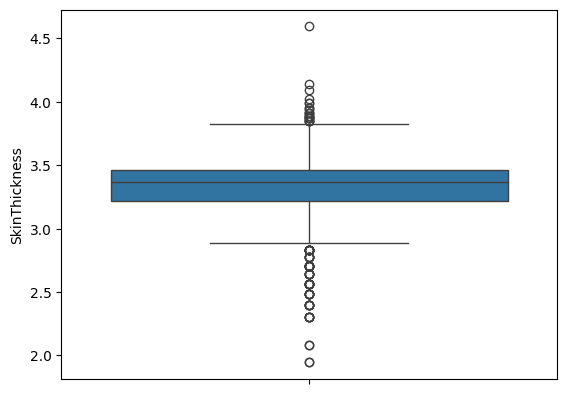

In [636]:
copy["SkinThickness"]=np.log(copy["SkinThickness"])
sns.boxplot(copy["SkinThickness"])

<Axes: ylabel='Insulin'>

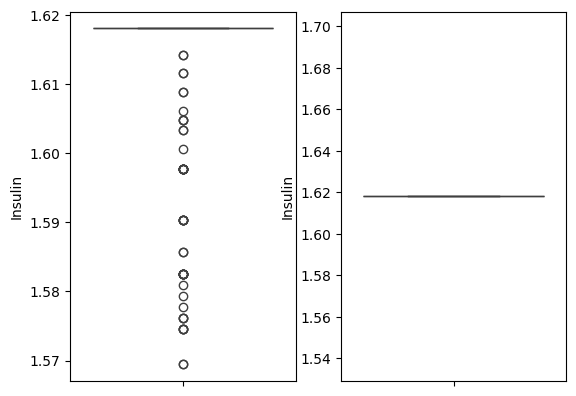

In [780]:
plt.subplot(1,2,1)
copy["Insulin"]=np.log(copy["Insulin"])
sns.boxplot(copy["Insulin"])
plt.subplot(1,2,2)
q1=copy["Insulin"].quantile(0.25)
q3=copy["Insulin"].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.2*iqr
copy=copy[(copy["Insulin"]<=q3)&(copy['Insulin']>=q1)]
sns.boxplot(copy["Insulin"])


50.550000000000004 13.35


<Axes: ylabel='BMI'>

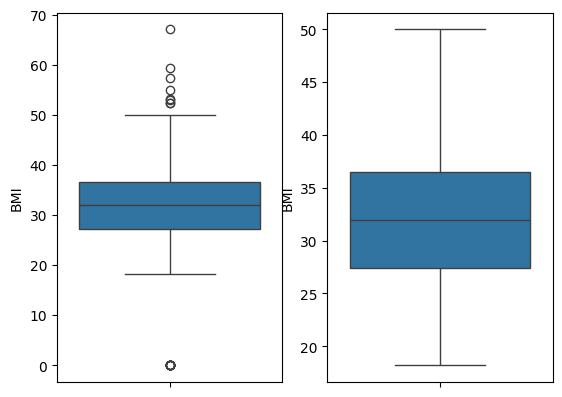

In [639]:
copy=datas.copy()
plt.subplot(1,2,1)
sns.boxplot(copy["BMI"])
q1=copy["BMI"].quantile(0.25)
q3=copy["BMI"].quantile(0.75)
iqr=q3-q1
lower=q1-iqr*1.5
upper=q3+iqr*1.5
print(upper, lower)
copy=copy[(copy["BMI"]>=lower) & (copy["BMI"]<=upper)]
plt.subplot(1,2,2)
sns.boxplot(copy["BMI"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               

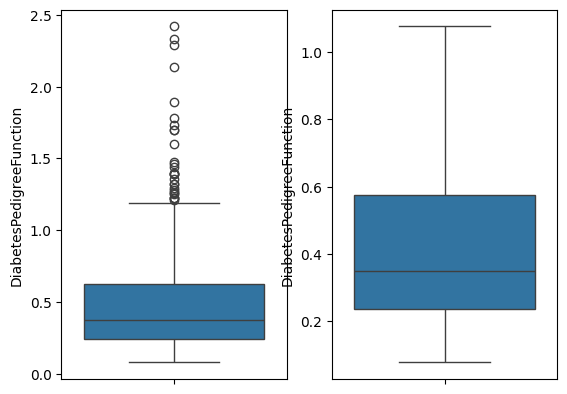

In [781]:
copy=datas.copy()
copy.info()
plt.subplot(1,2,1)
sns.boxplot(copy["DiabetesPedigreeFunction"])
lower_bound=copy["DiabetesPedigreeFunction"].quantile(0.25)
upper_bound=copy["DiabetesPedigreeFunction"].quantile(0.75)
iqr=upper_bound-lower_bound
lower=lower_bound-1.22*iqr
upper=upper_bound+1.22*iqr
copy=copy[(copy["DiabetesPedigreeFunction"]>lower) & (copy["DiabetesPedigreeFunction"]<upper)]
plt.subplot(1,2,2)
sns.boxplot(copy["DiabetesPedigreeFunction"])
copy.info()

<Axes: ylabel='Age'>

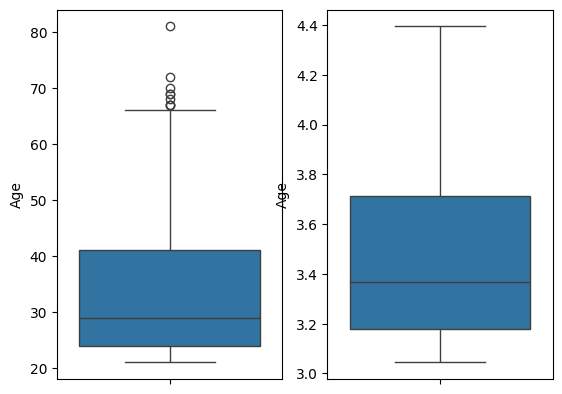

In [641]:
plt.subplot(1,2,1)
copy=datas.copy()
sns.boxplot(copy["Age"])
copy["Age"]=np.log(copy["Age"])
plt.subplot(1,2,2)
sns.boxplot(copy["Age"])

<Axes: title={'center': 'No outlier'}, ylabel='Outcome'>

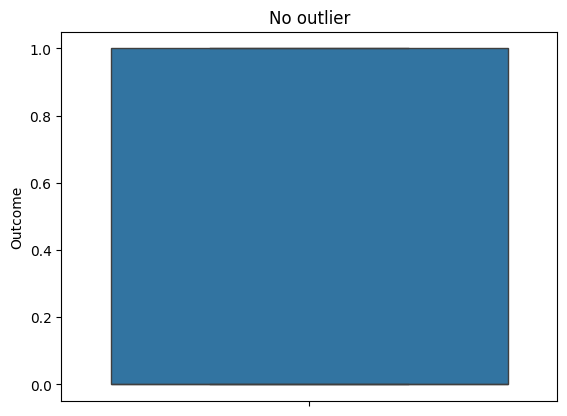

In [642]:
copy=datas.copy()
plt.title("No outlier")
sns.boxplot(copy["Outcome"])


In [643]:
#Feature enginnering 
"""
Here we play with columns to bring meaningful results"""

'\nHere we play with columns to bring meaningful results'

In [696]:
"""Age ko anusar category ma change garni(Like adult, old and very old)"""
# print(copy["Age"].min())
# print(copy["Age"].max())
copy["Age_category"]=pd.cut(copy["Age"], bins=[20,40,60,80],labels=["Adult","Old","Very_old"])
copy["Age_category"].value_counts()
copy["Age_category"]=copy["Age_category"].astype("string")

In [697]:
imp="Impossible"
ok="Average"
above="Above_Average(bad)"
warn="Can't handle much sugar well"
copy["Glucose_comment"]=pd.cut(copy["Glucose"],bins=[0,70,100,120,200],labels=[imp,ok,above,warn])
copy["Glucose_comment"].value_counts()
copy["Glucose_comment"]=copy["Glucose_comment"].astype("string")

In [698]:
#loop x chai outcome ko first dekhi last samma janxa. and if x is 1, Diabetic else not
copy["Diabetic"]=["Diabetic" if x==1 else "Non diabetic" for x in copy["Outcome"]]
copy["Diabetic"]=copy["Diabetic"].astype("string")
copy["Diabetic"].value_counts()
#But slow hola kinaki we are using list here

Diabetic
Non diabetic    501
Diabetic        268
Name: count, dtype: Int64

In [699]:
copy["Insulin/Glucose"]=copy["Insulin"]/copy["Glucose"]
#The value of glucose will not be 0. We have already corrected it
comment="""
Higher or lower both are risky. 
Higher means Insulin le dherai kaam garxa and
lower means Insulin ko engine bigriyo"""

# Check if any value in X is infinity
print(np.isinf(copy["Insulin/Glucose"]).sum())
# This will show how many infinity values exist
# print(copy.columns[np.isinf(copy["Insulin/Glucose"]).any()].tolist()) # This will show which columns have infinity

0


In [749]:
#Now linear regression
# copy.info()
print(np.isinf(copy["Insulin/Glucose"]).sum())
for_reg=copy.copy()

0


In [767]:
for_reg=copy.copy()#copy[["Age","Glucose","Pregnancies","Outcome","BloodPressure"]]

#axis =1 le columns haru hatauxa, axis=0 le rows

X=for_reg.drop(["Outcome","Glucose_comment","Age_category","Diabetic","Insulin/Glucose"],axis=1)#Removing outcome and other alpha columns
y=for_reg["Outcome"]

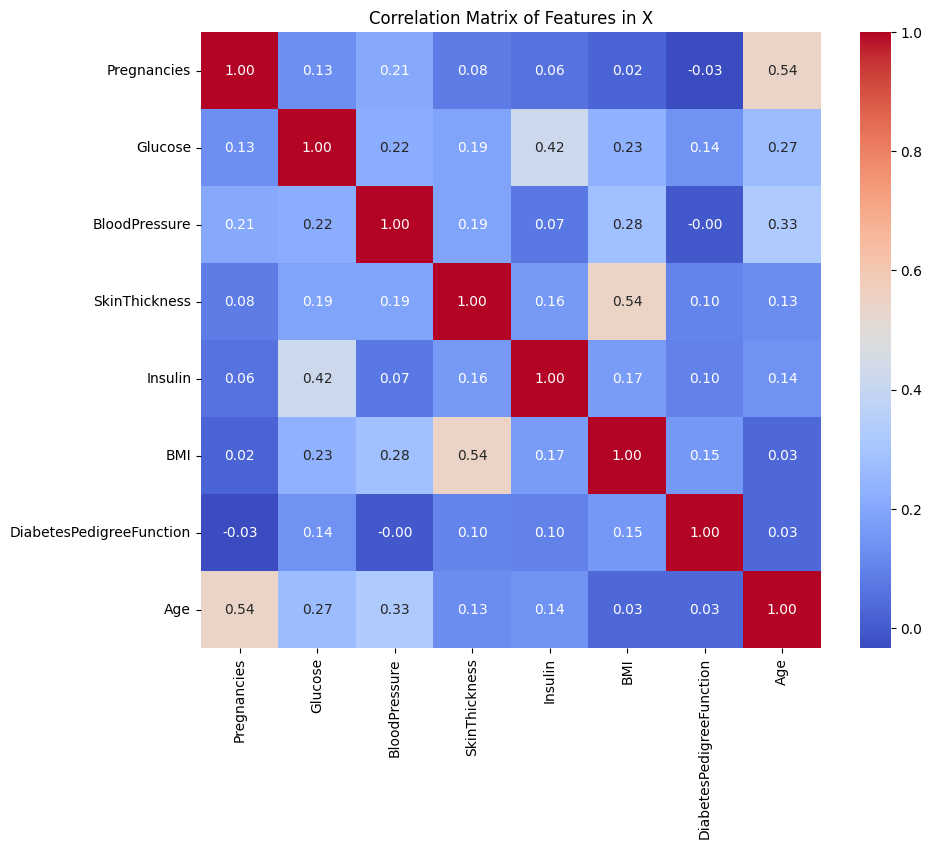

In [751]:
plt.figure(figsize=(10, 8))
x=X.corr()
sns.heatmap(x, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features in X')
plt.show()

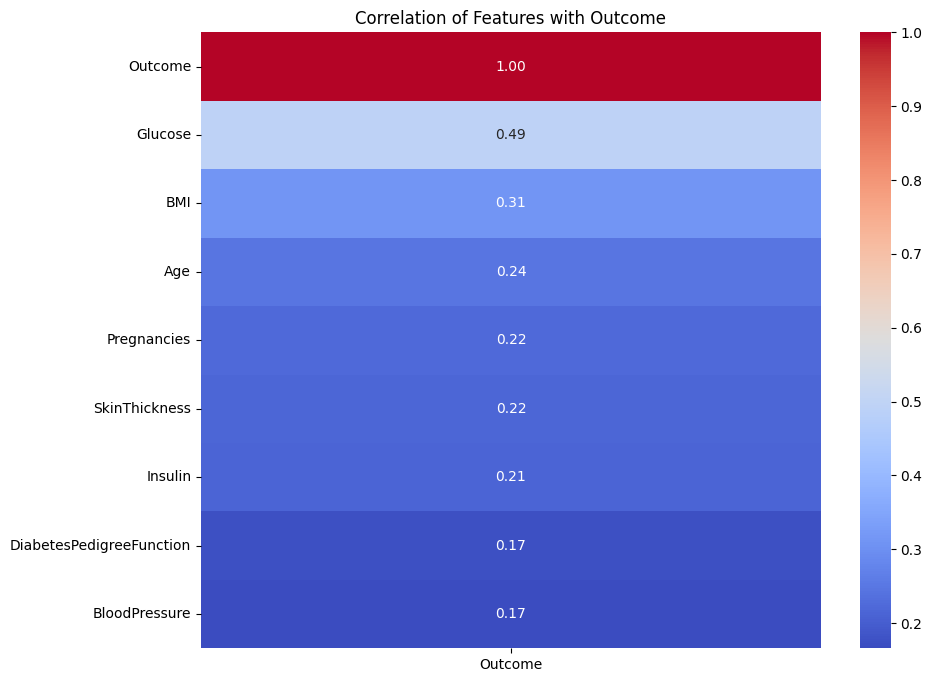

In [752]:
# Combine X and y for easier correlation calculation
df_combined = pd.concat([X, y], axis=1) #concat=concatenate matlab dubai columns lai jodxa
plt.figure(figsize=(10, 8))
sns.heatmap(df_combined.corr()[['Outcome']].sort_values(by='Outcome', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features with Outcome')
df_combined.head()
plt.show()

In [753]:
import numpy as np
# Check if any value in X is infinity
print(np.isinf(X).sum()) # This will show how many infinity values exist
print(X.columns[np.isinf(X).any()].tolist()) # This will show which columns have infinity

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
[]


In [754]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # scaler variable lai ready garni for its mission
X_scaled = scaler.fit_transform(X) #scaler ley X bata learn garxa. 
"""
Since there is StandardScaler so yesle mean and standard deviation lai calculate garxa matlab
average or spreadness lai calculate garxa for each individual column.
.transform: Once learned from statistic, it uses them to transform each value in X [It then returns numerical array]
"""
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # Convert back to DataFrame
#Now aaba numerical array lai DataFrame ma convert gareko xa keeping same name of column. 
print("\nScaled X (first 5 rows):")
print(X_scaled.head())

comment="""Imagine you have a dataset, X, with different columns (which we call "features" in machine learning). 
For example, one column might be "Age" (ranging from 18 to 80), 
and another might be "Salary" (ranging from $30,000 to $150,000). Notice how "Salary" has much larger numbers than "Age."

When you feed this raw data directly into many machine learning algorithms, 
features with larger values (like "Salary") can unintentionally dominate the learning process.
The algorithm might think "Salary" is more important just because its numbers are bigger, 
even if "Age" is actually more predictive of the outcome you're trying to predict."""


Scaled X (first 5 rows):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.642507  0.868465      -0.031796       0.670869 -0.004773  0.165987   
1    -0.843630 -1.197967      -0.527807      -0.011718 -0.004773 -0.852744   
2     1.236962  2.016483      -0.693144      -0.011718 -0.004773 -1.333003   
3    -0.843630 -1.066765      -0.527807      -0.694304 -0.722827 -0.634444   
4    -1.140858  0.507659      -2.677189       0.670869  0.148255  1.548551   

   DiabetesPedigreeFunction       Age  
0                  0.468141  1.446013  
1                 -0.364870 -0.187280  
2                  0.603957 -0.101317  
3                 -0.920210 -1.046908  
4                  5.481295 -0.015354  


In [755]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [756]:

#X, y lai X ra y test ma divide/split garinxa in such a way that test train gets 0.8
#i.e. 80% and test gets 20%
model=LogisticRegression() #Making model ready for mission
model.fit(X_test,y_test) #Model lai fit garepaxi it tres to find the best patterns 
#which is helpful for making predictions

/home/bishal/Documents/virtual/virtual/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [757]:
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (154, 8)
X_test shape: (613, 8)
y_train shape: (154,)
y_test shape: (613,)


In [758]:
from sklearn.linear_model import LogisticRegression
# Initialize the model
model = LogisticRegression(random_state=42)
# Train the model
model.fit(X_train, y_train) 
#Model lai fit garepaxi it tres to find the best patterns 

#X ko matrai pattern khojxa and predicts  y outcomes
#If it gives wrong prediction then MSE, r2 score xa ta herna
print("\nModel trained vayo!")


Model trained vayo!


/home/bishal/Documents/virtual/virtual/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [776]:
"""Aaba error pani herum through MSE, R2"""
from sklearn.metrics import mean_squared_error, r2_score
# Make predictions on the test set
y_pred_reg = model.predict(X_test) 
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_reg) #MSE is for computer or machines aani RMSE is for hami
rmse = np.sqrt(mse) 
# Root Mean Squared Error (RMSE) is often more interpretable

# Calculate R-squared (R2 Score)
r2 = r2_score(y_test, y_pred_reg)

print("\n--- Regression Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")
print("Total predicted: ",len(y_pred_reg))


--- Regression Model Evaluation ---
Mean Squared Error (MSE): 0.3636
Root Mean Squared Error (RMSE): 0.6030
R-squared (R2 Score): -0.5714
Total predicted:  154


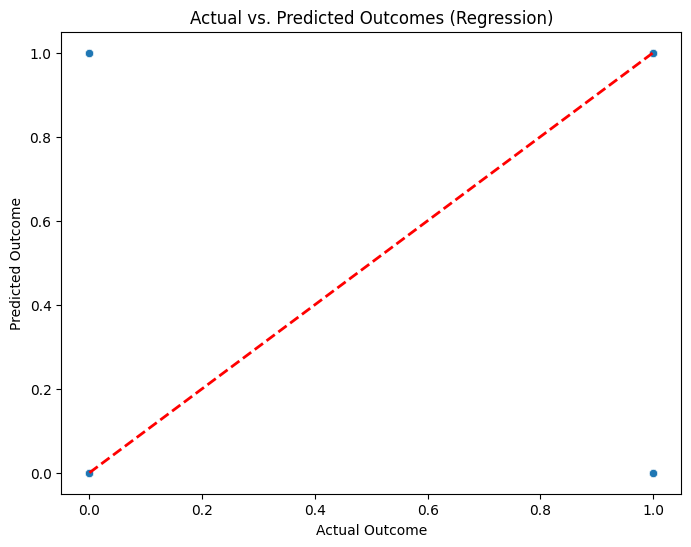

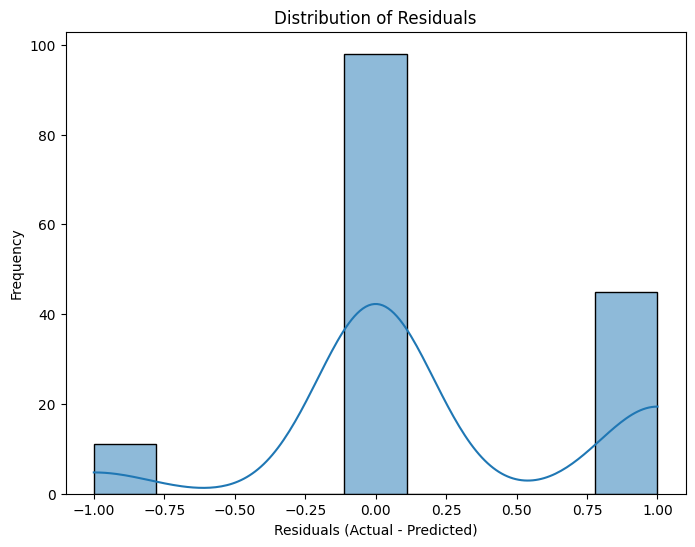

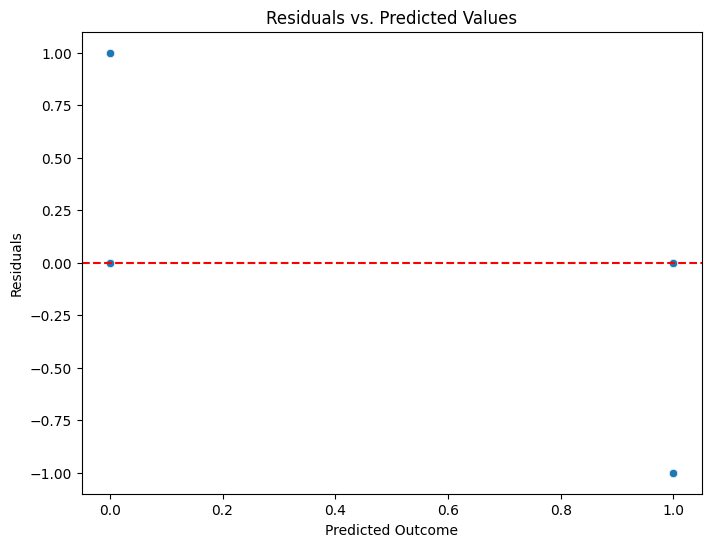

In [777]:

# You can also visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_reg)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Diagonal line for perfect prediction
#[X coordinates], ["Y coordinates"] so x1,y1=y.min(),y.min(), and x2,y2=y.max(),y.max()
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.title("Actual vs. Predicted Outcomes (Regression)")
plt.show()

# Residual Plot (Error distribution)
residuals = y_test - y_pred_reg #If residual >0: model underpredicted value and <0, model over predict
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True) #Since near to 0 is more so it means it made most of the prediction correct
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_reg, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Outcome")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


--- Model Evaluation ---
Accuracy: 0.7162
Precision: 0.6131
Recall: 0.4858
F1-Score: 0.5421
ROC AUC Score: 0.7290

Confusion Matrix:


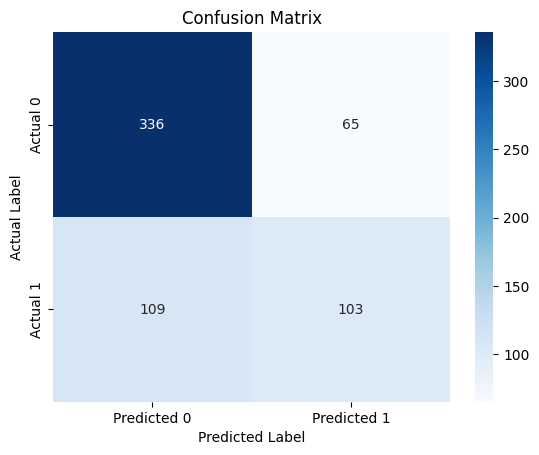


Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.79       401
         1.0       0.61      0.49      0.54       212

    accuracy                           0.72       613
   macro avg       0.68      0.66      0.67       613
weighted avg       0.71      0.72      0.71       613



In [763]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (1)

# Classification Metrics
print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report (provides all metrics per class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
"""Hyperparameter tuning"""

In [764]:
#Importing libraries for grid search since our data is less (9-10 oota column ra >800 rows) 
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters to search
#This dictionary defines the "grid" of hyperparameters that GridSearchCV will explore.
regulalization="Regularization is a technique used to prevent overfitting by adding a penalty to the model's loss function."
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    #If C ko value is sano, then large penalty small regulalization and  and 
    #If C ko value is thulo/big then (less penalty), 
    #allowing the model to fit the training data more closely, but potentially increasing the risk of overfitting.
    #In above, there is a range from very strong to very weak regularization
    'penalty': ['l1', 'l2'],            # Regularization type. Penalty specifies the type of regulization to apply 
    #l1=Lasso, l2=Ridge
    'solver': ['liblinear']             # 'liblinear' supports both l1 and l2
    #lib linear works well for relatively small dataset
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

comment=""" param_grid:
This specifies the number of folds for k-fold cross-validation. The training data (X_train, y_train) will be split into 5 folds. 
For each combination of hyperparameters in param_grid, the model will be trained on 4 folds and evaluated on the remaining 1 fold, 
and this process will be repeated 5 times (each fold serving as the validation set once). 
This helps to get a more robust estimate of the model's performance and reduces the chance of overfitting to a single train-test split

scoring="roc_auc": is a common metric for binary classification problems, especially when dealing with imbalanced datasets,
n_jobs=-1: means "use all available processors," which can significantly speed up the grid search process
"""

# Fit on training data
grid_search.fit(X_train, y_train)
comment="""Iterate through every possible combination of hyperparameters defined in param_grid

"""
print(f"\nBest hyperparameters found: {grid_search.best_params_}")
#A dictionary containing the specific combination of hyperparameters
# that resulted in the highest average roc_auc score during the cross-validation.
print(f"Best ROC AUC score: {grid_search.best_score_:.4f}")
comment="""
The actual best average roc_auc score achieved with those best hyperparameters."""


# Get the best model
best_model = grid_search.best_estimator_
comment="""Once the grid search is complete, 
GridSearchCV automatically trains a final model 
on the entire training dataset (X_train, y_train) using the best_params_ found.
This line retrieves that optimally tuned model
"""

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

print("\n--- Evaluation of Best Model ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_best):.4f}")


Best hyperparameters found: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC score: 0.8503

--- Evaluation of Best Model ---
Accuracy: 0.7667
ROC AUC Score: 0.8135


In [765]:
# Example: Predict for a new, hypothetical patient
new_patient_data = pd.DataFrame([[
    1,   # Pregnancies
    100, # Glucose
    70,  # BloodPressure
    20,  # SkinThickness
    50,  # Insulin
    25.0,# BMI
    0.3, # DiabetesPedigreeFunction
    30   # Age
]], columns=X.columns)

# Remember to scale new data using the SAME scaler5 fitted on the training data
new_patient_data_scaled = scaler.transform(new_patient_data)

predicted_outcome = best_model.predict(new_patient_data_scaled)
predicted_proba = best_model.predict_proba(new_patient_data_scaled)[0, 1]

print(f"\nPredicted Outcome for new patient: {predicted_outcome[0]}")
print(f"Probability of Outcome 1 (Diabetic): {predicted_proba:.4f}")

# Interpretation (for Logistic Regression)
print("\n--- Model Coefficients (Interpretation) ---")
# Coefficients show the log-odds change in outcome for a one-unit increase in feature
# For scaled features, coefficients are comparable in magnitude
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': best_model.coef_[0]})
print(coefficients.sort_values(by='Coefficient', ascending=False))


Predicted Outcome for new patient: 0.0
Probability of Outcome 1 (Diabetic): 0.0000

--- Model Coefficients (Interpretation) ---
                    Feature  Coefficient
6  DiabetesPedigreeFunction     2.268742
0               Pregnancies     0.208945
5                       BMI     0.086327
1                   Glucose     0.050760
2             BloodPressure     0.013179
4                   Insulin    -0.000748
3             SkinThickness    -0.010172
7                       Age    -0.040344


/home/bishal/Documents/virtual/virtual/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/bishal/Documents/virtual/virtual/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [770]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Assuming your data is in a DataFrame called 'df'
#     'Pregnancies': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'Glucose': [100, 120, 90, 110, 130, 95, 105, 115, 125, 85],
#     'BloodPressure': [70, 80, 65, 75, 85, 60, 70, 80, 90, 65],
#     'SkinThickness': [20, 25, 18, 22, 28, 15, 20, 24, 30, 16],
#     'Insulin': [50, 60, 45, 55, 65, 40, 50, 60, 70, 35],
#     'BMI': [25.1, 28.5, 22.3, 26.7, 30.1, 21.5, 24.5, 27.8, 31.2, 20.8],
#     'DiabetesPedigreeFunction': [0.3, 0.5, 0.2, 0.4, 0.6, 0.1, 0.35, 0.45, 0.55, 0.15],
#     'Age': [30, 40, 25, 35, 45, 20, 32, 38, 48, 22],
#     'Outcome': [0.1, 0.8, 0.05, 0.3, 0.9, 0.02, 0.25, 0.7, 0.95, 0.01] # Continuous values
# }
df=copy.copy()
X=df.drop(["Outcome","Glucose_comment","Age_category","Diabetic","Insulin/Glucose"],axis=1)
y=df["Outcome"]
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data - NO stratify for regression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (613, 8)
X_test shape: (154, 8)
y_train shape: (613,)
y_test shape: (154,)


In [773]:
copy.to_csv("~/Downloads/Dataset/updated_csv.csv",index=False)